# Bibliotecas

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from tqdm.notebook import tqdm
import pandas as pd

In [2]:
driver = webdriver.Firefox()

In [3]:
#driver.implicitly_wait(10)
#driver.maximize_window()

# Capturando Site de Aluguel

In [28]:
list_titulo_anuncio = list()
list_endereco_anuncio = list()
list_area_anuncio = list()
list_numero_quartos = list()
list_numero_banheiros = list()
list_numero_garagem = list()
list_preco = list()
list_condominio = list()
list_amenidades = list()

In [29]:
# Desafios 1: Aumentar o número de busca para até 10 páginas
# Desafios 2: Aumentar o filtro para capturar casas e apartamentos

In [30]:
pbar = tqdm(range(1,6))

for pagina in pbar:

    #Acessando a pagina de acordo com o indice
    url = f'https://www.vivareal.com.br/aluguel/sp/sao-paulo/apartamento_residencial/?pagina={pagina}'
    
    #TQDM com a informação de progresso
    pbar.set_description("Processando página %s" % pagina)

    #Faz requisição de acesso a página
    driver.get(url)

    #Acessa os anuncios atraves do nome da Classe html
    resultados = driver.find_elements(By.CLASS_NAME,'property-card__content')

    pbar2 = tqdm(resultados)
    for elemento_1 in pbar2:

        list_titulo_anuncio.append(elemento_1.find_element(By.CLASS_NAME,'property-card__title').text)
        list_endereco_anuncio.append(elemento_1.find_element(By.CLASS_NAME,'property-card__address-container').text)
        list_area_anuncio.append(elemento_1.find_element(By.CLASS_NAME,'property-card__detail-area').text)
        list_numero_quartos.append(elemento_1.find_element(By.CLASS_NAME,'property-card__detail-room').text)
        list_numero_banheiros.append(elemento_1.find_element(By.CLASS_NAME,'property-card__detail-bathroom').text)
        list_numero_garagem.append(elemento_1.find_element(By.CLASS_NAME,'property-card__detail-garage').text)
        list_preco.append(elemento_1.find_element(By.CLASS_NAME,'property-card__price').text)
        
        #Caso não tenha condominio ele retorna N/A
        try:
            list_condominio.append(elemento_1.find_element(By.CLASS_NAME,'property-card__price-details--condo').text)
        except:
            list_condominio.append('N/A')
            
        amenidade = elemento_1.find_elements(By.CLASS_NAME,'amenities__item')
        list_amenidades.append([am.text for am in amenidade])      
    

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

# Tratamento das informações

## Titulo

In [31]:
list_titulo_anuncio

['Apartamento com 4 Quartos para Aluguel, 360m²',
 'Apartamento com 2 Quartos para Aluguel, 120m²',
 'Apartamento com 2 Quartos para Aluguel, 64m²',
 'Apartamento com Quarto para Aluguel, 26m²',
 'Apartamento com Quarto para Aluguel, 31m²',
 'Apartamento com 3 Quartos para Aluguel, 126m²',
 'Apartamento com 2 Quartos para Aluguel, 55m²',
 'Apartamento com 2 Quartos para Aluguel, 74m²',
 'Apartamento com 3 Quartos para Aluguel, 118m²',
 'Apartamento com Quarto para Aluguel, 50m²',
 'Apartamento com Quarto para Aluguel, 33m²',
 'Apartamento com 2 Quartos para Aluguel, 219m²',
 'Apartamento com Quarto para Aluguel, 66m²',
 'Apartamento com 3 Quartos para Aluguel, 110m²',
 'Apartamento com 2 Quartos para Aluguel, 67m²',
 'Apartamento com 2 Quartos para Aluguel, 48m²',
 'Apartamento com Quarto para Aluguel, 43m²',
 'Apartamento com Quarto para Aluguel, 38m²',
 'Apartamento com Quarto para Aluguel, 50m²',
 'Apartamento com 2 Quartos para Aluguel, 79m²',
 'Apartamento com Quarto para Aluguel,

## Endereço

In [32]:
endereco = list()
numeros = list()
bairro =list()
cidade = list()
estado = list()

In [33]:
# Desafio 3: Extrair as informações de endereço via regex

In [34]:
for end in tqdm(list_endereco_anuncio):
    
    #Capturar as informações macro
    tokens_macro = end.split("-")
    
    #Endereço e número
    endereco_numero = tokens_macro[0].split(",")
    
    if len(endereco_numero)>1:
        endereco.append(endereco_numero[0].strip())
        numeros.append(int(endereco_numero[1].strip()))
    else:
        endereco.append(endereco_numero[0].strip())
        numeros.append(0)
        
    #Bairro e cidade
    b, c = tokens_macro[1].split(',')
    bairro.append(b.strip())
    cidade.append(c.strip())
    
    #Estado
    estado.append(tokens_macro[2].strip())

  0%|          | 0/180 [00:00<?, ?it/s]

## Area

In [35]:
areas = [float(area.split(" ")[0]) for area in list_area_anuncio]

## Número de Quartos

In [36]:
quartos = [int(q.split(" ")[0]) for q in list_numero_quartos]

## Número de banheiros

In [37]:
banheiros = [int(b.split(" ")[0]) for b in list_numero_banheiros]

## Vagas de Garagem

In [38]:
vagas_garagem = [int(g.split(" ")[0]) if g != '-- Vaga' else 0 for g in list_numero_garagem]

## Preço

In [39]:
float('3.900'.replace(".",""))

3900.0

In [40]:
precos = [float(p.split(" ")[1].replace(".","")) for p in list_preco]

## Condominio

In [41]:
condominio = [float(c.split(" ")[-1].replace(".","")) if c!= "N/A" else 0.0 for c in list_condominio]

# Construindo Dataset

In [42]:
dataset = pd.DataFrame({'Titulo': list_titulo_anuncio,
                        'Endereco': endereco,
                        'Numero': numeros,
                        'Bairro': bairro,
                        'Cidade': cidade,
                        'Estado':estado,
                       'Area': areas,
                       'Quartos':quartos,
                       'Banheiros':banheiros,
                       'Vagas':vagas_garagem,
                       'Preco':precos})


In [43]:
dataset.head()

,Titulo,Endereco,Numero,Bairro,Cidade,Estado,Area,Quartos,Banheiros,Vagas,Preco
0,"Apartamento com 4 Quartos para Aluguel, 360m²",Rua Professor Tamandaré Toledo,104,Itaim Bibi,São Paulo,SP,360.0,4,4,2,13000.0
1,"Apartamento com 2 Quartos para Aluguel, 120m²",Rua Tabapuã,38,Itaim Bibi,São Paulo,SP,120.0,2,2,1,8500.0
2,"Apartamento com 2 Quartos para Aluguel, 64m²",Rua Dona Ana Neri,581,Cambuci,São Paulo,SP,64.0,2,2,1,4400.0
3,"Apartamento com Quarto para Aluguel, 26m²",Rua Doutor Penaforte Mendes,157,Bela Vista,São Paulo,SP,26.0,1,1,1,1200.0
4,"Apartamento com Quarto para Aluguel, 31m²",Rua Luiz Seráphico Júnior,430,Chácara Santo Antônio,São Paulo,SP,31.0,1,1,0,2000.0


## Bonus  = Amenidades

In [134]:
df_amenidades = pd.DataFrame(list_amenidades)

In [135]:
df_amenidades.columns = [f'col_{x}' for x in df_amenidades.columns]

In [136]:
df_amenidades = df_amenidades.reset_index()

In [137]:
df_amenidades.shape

(180, 7)

In [142]:
df_amenidades.fillna('...',inplace=True)

In [143]:
df_amenidades_melt = pd.melt(df_amenidades,id_vars='index',value_vars = df_amenidades.columns)

In [151]:
df_amenidades_final = pd.crosstab(df_amenidades_melt['index'],columns=df_amenidades_melt['value']).reset_index()

In [156]:
df_amenidades_final.drop(columns=['index','...'],inplace=True)

In [159]:
dataset = pd.concat([dataset,df_amenidades_final],axis=1)

# Treino do modelo

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

## Dividir o dataset

In [161]:
dataset.columns

Index(['Titulo', 'Endereco', 'Numero', 'Bairro', 'Cidade', 'Estado', 'Area',
       'Quartos', 'Banheiros', 'Vagas', 'Preco', 'Academia', 'Aceita animais',
       'Ar-condicionado', 'Bicicletário', 'Churrasqueira',
       'Condomínio fechado', 'Cozinha americana', 'Dependência de empregados',
       'Elevador', 'Espaço gourmet', 'Jardim', 'Mobiliado', 'Piscina',
       'Playground', 'Portaria 24h', 'Portão eletrônico', 'Salão de festas',
       'Sauna', 'Varanda'],
      dtype='object')

In [162]:
X_columns =['Area','Quartos', 'Banheiros', 'Vagas', 'Academia', 'Aceita animais',
           'Ar-condicionado', 'Bicicletário', 'Churrasqueira',
           'Condomínio fechado', 'Cozinha americana', 'Dependência de empregados',
           'Elevador', 'Espaço gourmet', 'Jardim', 'Mobiliado', 'Piscina',
           'Playground', 'Portaria 24h', 'Portão eletrônico', 'Salão de festas',
           'Sauna', 'Varanda']

In [163]:
y_column = 'Preco'

## Visualizando os dados

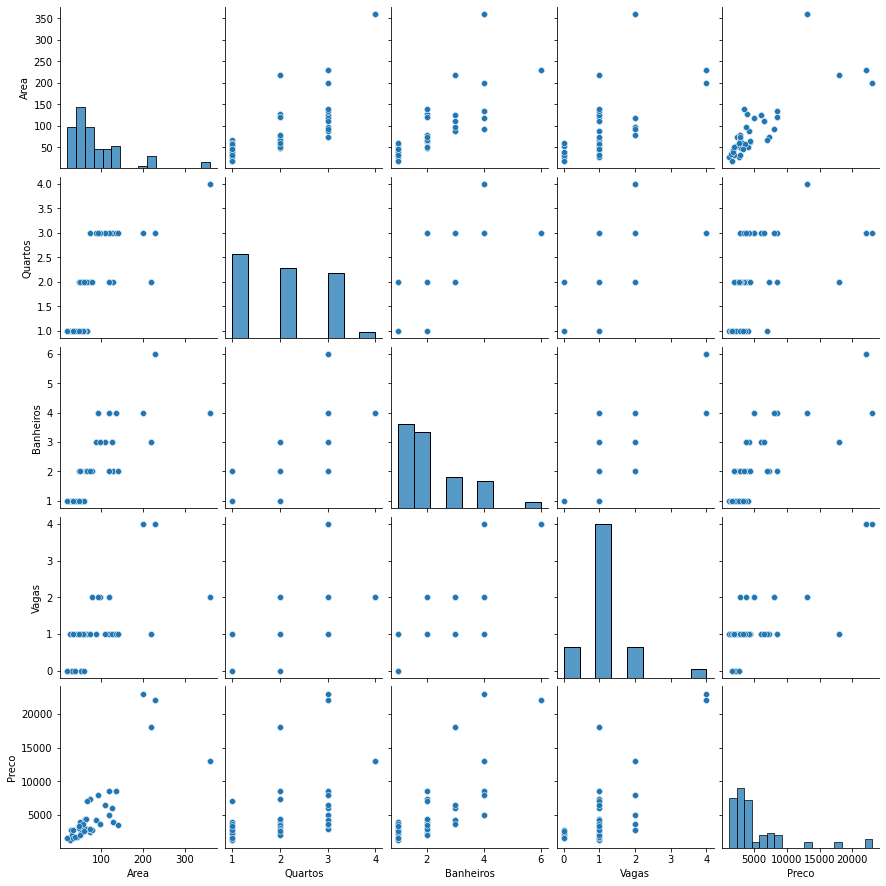

In [166]:
sns.pairplot(dataset[['Area','Quartos', 'Banheiros', 'Vagas','Preco']])

## Divindo o dataset

In [168]:
X_train, X_test, y_train, y_test = train_test_split(dataset[X_columns], dataset['Preco'], test_size=0.20, random_state=42)

## Treinando o modelo

In [173]:
# realizar a normalização dos dados para evitar enviesamento do modelo
dataset[X_columns].describe()

,Area,Quartos,Banheiros,Vagas,Academia,Aceita animais,Ar-condicionado,Bicicletário,Churrasqueira,Condomínio fechado,...,Espaço gourmet,Jardim,Mobiliado,Piscina,Playground,Portaria 24h,Portão eletrônico,Salão de festas,Sauna,Varanda
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,87.577778,1.972222,2.122222,1.116667,0.572222,0.461111,0.166667,0.027778,0.288889,0.588889,...,0.027778,0.111111,0.344444,0.622222,0.016667,0.222222,0.027778,0.072222,0.027778,0.083333
std,67.792153,0.880773,1.198955,0.785874,0.496137,0.499876,0.373718,0.164794,0.454510,0.493408,...,0.164794,0.315146,0.476512,0.486184,0.128376,0.416899,0.164794,0.259578,0.164794,0.277156
min,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,112.000000,3.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,360.000000,4.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [172]:
linear_model = LinearRegression()

In [174]:
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [176]:
# Realizando uma previsão
predict = linear_model.predict(X_test)

In [177]:
# Visualizando o Erro
mean_squared_error(y_test,predict)

2936007.96615193

In [179]:
mean_absolute_error(y_test,predict)

1112.8966025614427

# Sugestões de  melhoria

- Capturar mais informações
- Realizar normalização dos dados
- Otimizar os hiperparametros do modelo de regressão Linear
- Tentar outros modelos

- Valor a ser superado : Mean Absolute Error de R\$ = 1112,89